<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2023 Analysing real spectra (120 points)</h2>

In this exercise we will look at the spectra of three objects that we took as part of the class in a previous year: M57 - a planetary nebula, Jupiter as seen in reflected sunlight, and the star Vega.

All code elements that you need to change will be indicated with a #**************** section in the code

There are 6 problems.  This assignment is worth 120 points.

**Due on Dec. 6 at 11:59am**

In [1]:
import astropy.units as u
from astropy.table import unique, Table
import numpy as np
from matplotlib import pyplot as plt
import os
from specutils import Spectrum1D
from numpy.random import uniform
import matplotlib.transforms as transforms

In [2]:
'''
This subroutine will allow us to draw lines on our spectra.  

It takes as input a dictionary of lines and plots a vertical line and a label at each wavelength of the dictionary.

'''
def lineplot(linelist):
    transDA = transforms.blended_transform_factory(
    ax.transData, ax.transAxes) #  from the transforms tutorial

    for line in linelist:
        if((line[1]>lammin) & (line[1]<lammax)):
            plt.axvline(linewidth=0.5,color='r',x=line[1])
            plt.text(line[1], #wavelength from list
                     uniform(0.5,1), # wiggle the labels so they don't overlap
                     line[0], # string label
                     transform=transDA,
                     color='red',
                     family='serif')

### Measure characteristics of the spectrum

This spectrum was taken with the Breyo telescope.  It has been fully reduced and wavelength calibrated.  The flux is delivered in each pixel.

### Identify features in spectrum of M57

In this exercise you will identify various components of the spectrum of M57.  In doing this you can zoom in and out of the plot using the `ax.set_xlim` and `ax.set_ylim()` commands.  

### Problem 1 - identify lines (10 points)
Uncomment all the spectral features in the "linelist" variable that correspond to clear features in the spectrum.    *Note: Not all features have line designations in my list*

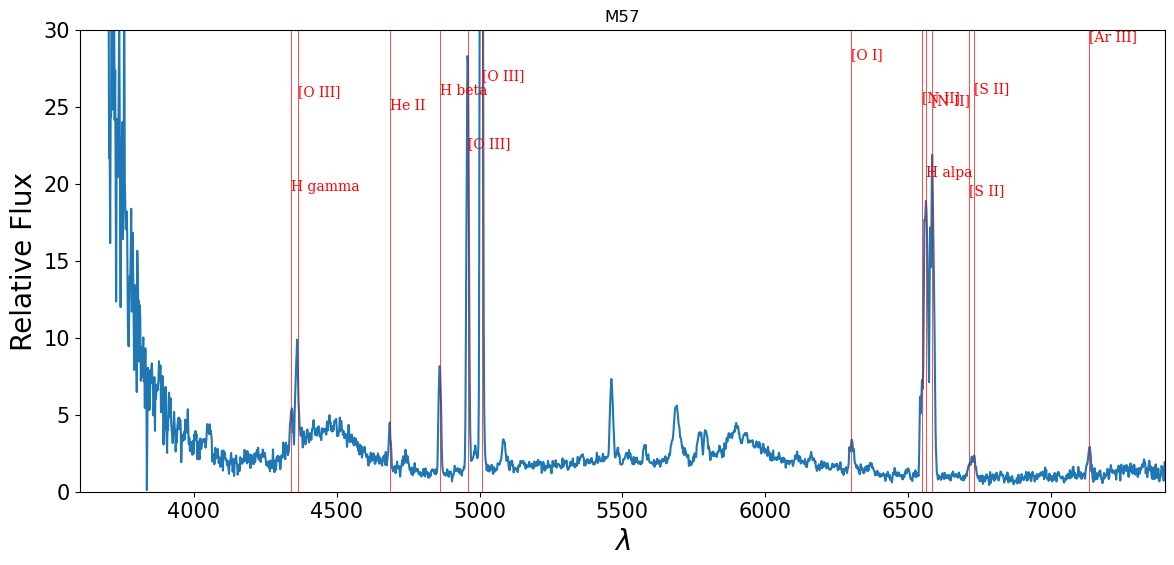

In [3]:
#read in the three spectra we took
m57_path = 'M57_Object_CROP.fit'
vega_path ='Vega_Object_CROP.fit'
jup_path = 'Jupiter_Object_CROP.fit'

specm57 = Spectrum1D.read(m57_path)
specjup = Spectrum1D.read(jup_path)
specvega = Spectrum1D.read(vega_path)

#plot the M57 spectrum
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specm57.wavelength,specm57.flux,label="M57")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.title('M57')

#**************
#your code here
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
fluxmin = 0
fluxmax = 30
lammin = 3600
lammax = 7400
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])

#***************************
#your code here
#Uncomment all of the lines that correspond to identifiable features in the spectra
linelist = [
  #   ('[AR IV]',4740), #maybe but too noisy to be definitive
 #    ('[OII]',3727), #too noisy in the area to be definitive
     ('[O III]',4363),
     ('[O III]',4959),
     ('[O III]',5007),
     ('[O I]',6300),
    #('[OI]',6363), no
     ('[N II]',6548),
     ('[N II]',6584),
     ('[S II]',6716),
     ('[S II]',6731),
   #  ('CIII',4647), #no
  #   ('MgI',5170), no
  #   ('FeI', 5270), no
#     ('Hepsilon',3970), #Too noisy 
  #   ('Hdelta',4103), #no would have been surprised to see this
     ('H gamma',4341), #maybe 
     ('H beta',4861),
     ('H alpa',6563),
#     ('NaD', 5890), no
 #    ('HeII',4541), #too noisy to resolve
     ('He II',4686),
  #   ('HeI',4471), no too noisy 
 #    ('HE II',5411), no
 #    ('[CL III]',5517), no
 #    ('[CL III]',5537), no
 #    ('[N II]',5755), #maybe but is offset
    # ('He I',5875),no
    # ('HeI',7065), no
     ('[Ar III]',7135),
 #    ('FeI',5335) no
]
#draw lines on the spectrum
lineplot(linelist)

### Problem 2  - measure the spectral resolution of the spectrograph (30 points)
Using the code block below, measure the wavelength resolution $\Delta \lambda$ and the spectral resolution $R$ for the M57 spectra.  Any derivation you do to solve the problem must be explained here.  

Assume that the intrinsic width of the spectral lines is significantly smaller than $\Delta\lambda$.  

We will try two different estimates, one using measurements by eye and one by fitting a model to the line.

There are parts a-d in this problem.

#### Problem 2a - compute the quantities using a by eye estimates (10 points)

Delta Lambda = 11.50
R = 422.70


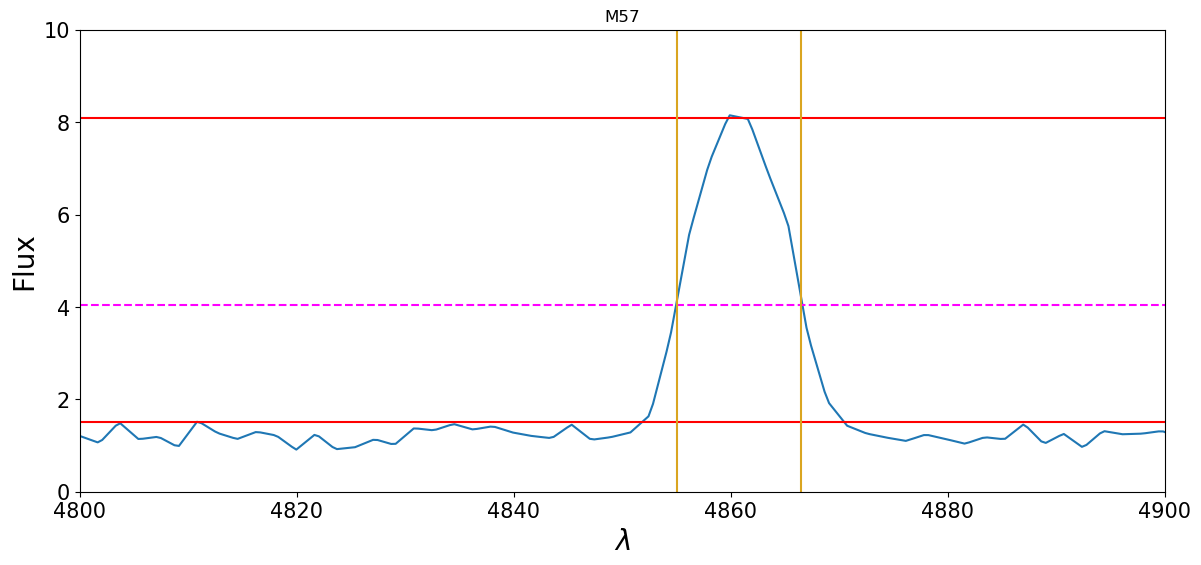

In [15]:
#first zoom in on one emission line and plot it.
#Choose one of the identified lines, which are real, and which is isolated enough to properly characterize.
#plot the M57 spectrum
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specm57.wavelength,specm57.flux,label="M57")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda$",fontsize=20)
plt.ylabel("Flux",fontsize=20)
plt.title('M57')

#you can change these limits to zoom in and out of certain parts of the spectra.  You should use the Hbeta line for your measurement
#**************
#Your code here.
fluxmin = 0
fluxmax = 10
lammin = 4800
lammax = 4900
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])

#In the following section of code you will need to estimate the continuum and the peak of the line as horizontal lines.  Then 
#continuum level
contlevel = 1.5 #by eye
plt.axhline(contlevel, color='red')

#line peak
linepeak = 8.1 #by eye
plt.axhline(linepeak, color='red')

#Provide a calculation to determine the half maximum
halfmax = linepeak/2 #assuming you just mean half the maximum of the peak
plt.axhline(halfmax,color='magenta',linestyle='--')

#Now find wavelengths corresponding to short and long wavelength sides of FWHM by using the vertical 
#lines that will be drawn on the graph
lowlam = 4855
highlam = 4866.5
plt.axvline(lowlam,color='goldenrod')
plt.axvline(highlam,color='goldenrod')

#calculate the FWHM
deltalam = highlam-lowlam
print('Delta Lambda = %5.2f' % deltalam)

#calculate the spectral resolution
lamcent = 4861
specres = lamcent/deltalam
print('R = %6.2f' % specres)

#### Problem 2b - compute the quantities by fitting a function (10 points)

First we need to fit a continuum and subtract it, as the fitting functions require a continuum subtracted spectrum.  The result of this should be a continuum with a level of zero.  Your continuum subtracted spectrum should have as flat of a continuum as possible, ignoring the regions that you exclude from the fitting (see below).

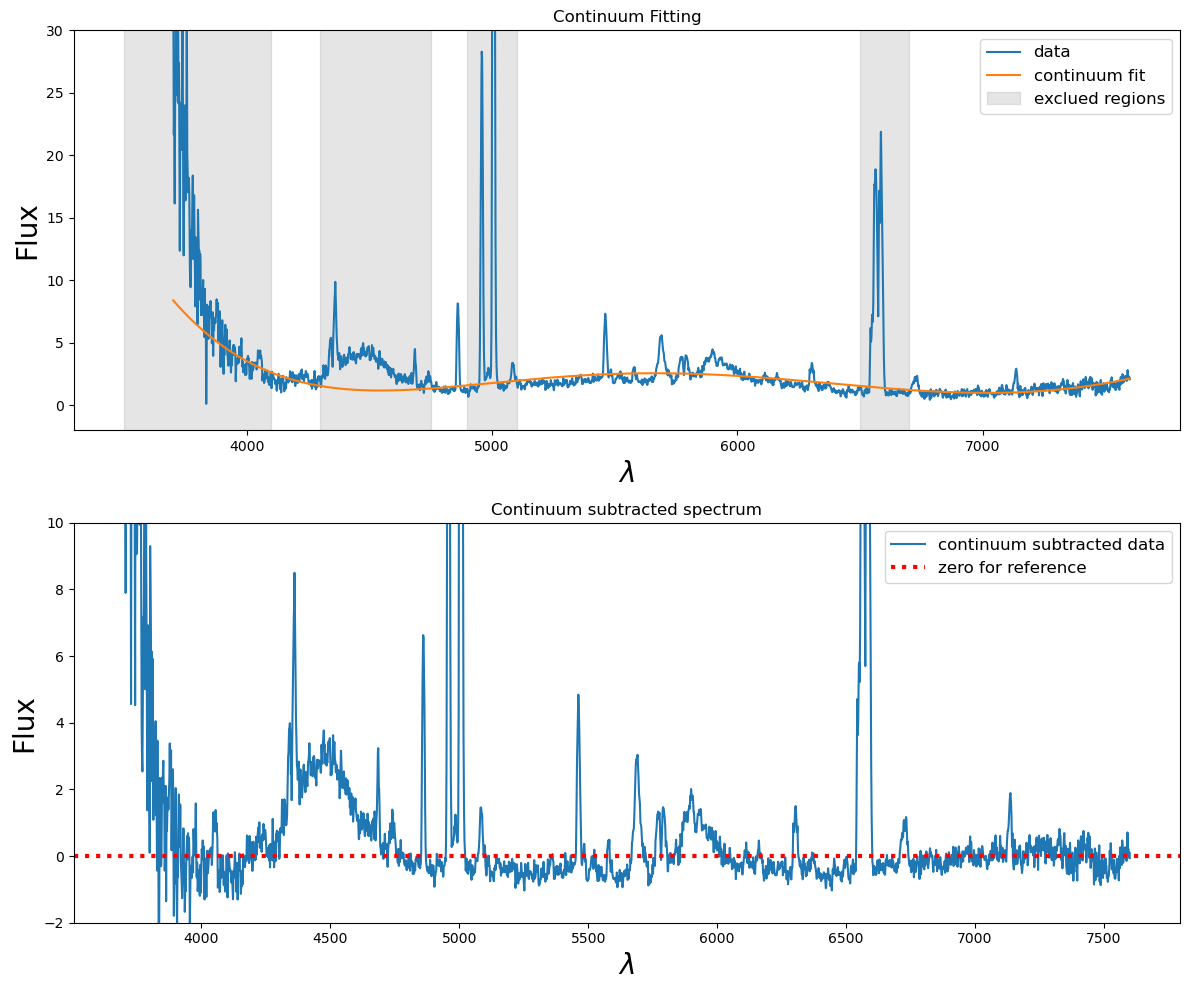

In [34]:
from specutils.fitting.continuum import fit_generic_continuum
from specutils.spectra import Spectrum1D, SpectralRegion
import warnings
import astropy.units as u
from astropy.modeling import models, fitting

#you will need to define spectral regions to exclude.  The fitting algorithm fits a running median of the spectra, 
#which helps to get rid of weak emission lines, however, you should try to define windows to remove the other emission lines. 
#We make these regions using the "SpectralRegion" function and I give you two such regions below to demonstrate.  
#I exclude the very blue short wavelength region as it is hard to fit that with the function I use and because
#there are no emission lines of interest there.
#You should fill in the other regions.
#these are lists of the lower and upper bounds of the regions not to fit
lamlow = [3500,4300]
lamhigh = [4100,4750]

#************************
#your other regions go here. 
#a list of the lower bounds
lamlow.extend([4900,6500])
#a list of the upper bounds
lamhigh.extend([5100,6700])

#this creates the SpectralRegion that contains all of the excluded regions
for ilam,lam in enumerate(lamlow):
    #create the excl_region for the first region
    if ilam==0:
        excl_region = SpectralRegion(lamlow[ilam] * u.Angstrom,lamhigh[ilam] * u.Angstrom)

    #append to it for the following regions.
    excl_region += SpectralRegion(lamlow[ilam] * u.Angstrom,lamhigh[ilam] * u.Angstrom)
    
#*************
#You will need to play around with the degree of the Chebyshev polynomial and the median_window parameter to get a good fit.  
#Your continuum subtracted spectrum should
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
    fitted_continuum = fit_generic_continuum(specm57,exclude_regions=excl_region, median_window=3 ,
                                             model=models.Chebyshev1D(degree= 5 ))  #not really sure what these parameters I'm playing with do at some point I just called it good
#this is the fitted continuum
y_fit = fitted_continuum(specm57.wavelength)

#plot the spectrum and the continuum fit
f,(ax1,ax2) = plt.subplots(2,1,figsize=(12,10))  
ax1.plot(specm57.wavelength, specm57.flux,label='data')  
ax1.plot(specm57.wavelength, y_fit,label='continuum fit')  
ax1.set_title("Continuum Fitting")  
ax1.set_ylim(-2,30)
ax1.set_xlabel("$\lambda$",fontsize=20)
ax1.set_ylabel("Flux",fontsize=20)

#to help you decide which regions to exclude, plot gray regions that are excluded.
for ilam,lam in enumerate(lamlow):
    ax1.fill_betweenx([-100,100],lamlow[ilam],x2=lamhigh[ilam],color='gray',alpha=0.2,label='exclued regions')

    #only make the legend after the first iteration so it only makes one box
    if ilam==0:
        ax1.legend(fontsize=12)

#plot the continuum subtracted spectrum
contsubspec = specm57.flux - y_fit
ax2.plot(specm57.wavelength, contsubspec, label='continuum subtracted data')  
ax2.set_title("Continuum subtracted spectrum")  
ax2.set_ylim(-2,10)
ax2.axhline(0.0,color='red',linestyle=':',linewidth=3,label='zero for reference')
ax2.set_xlabel("$\lambda$",fontsize=20)
ax2.set_ylabel("Flux",fontsize=20)
ax2.legend(fontsize=12)

#this optimizes the spacing between the figures
f.tight_layout()

Now let's zoom in on the Hbeta line and see how well our continuum fit did.

Text(0, 0.5, 'Flux')

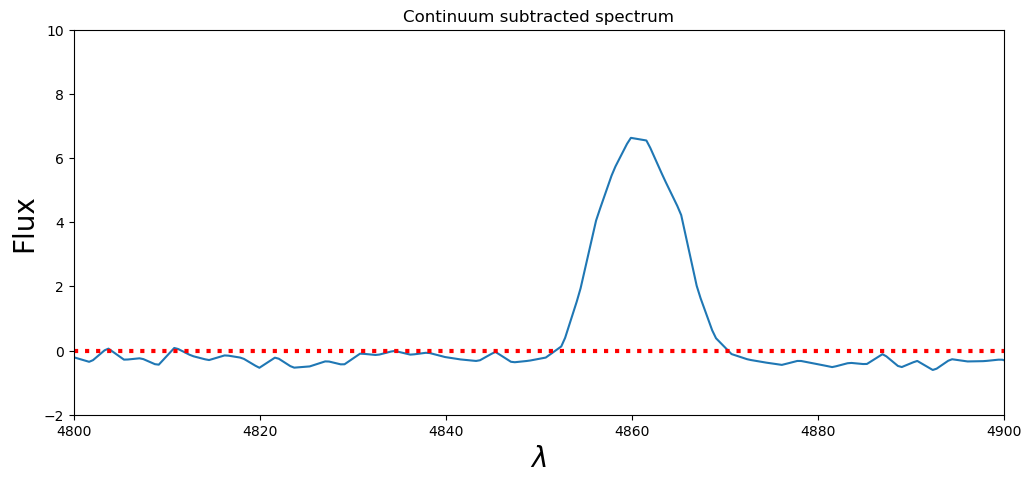

In [35]:
from specutils.fitting import fit_lines

#first zoom in on the Hbeta line
f,ax = plt.subplots(figsize=(12,5))  
ax.plot(specm57.wavelength, contsubspec, label='continuum subtracted data')  
ax.set_title("Continuum subtracted spectrum")  
ax.set_xlim(4800,4900)
ax.set_ylim(-2,10)
ax.axhline(0.0,color='red',linestyle=':',linewidth=3,label='zero for reference')
ax.set_xlabel("$\lambda$",fontsize=20)
ax.set_ylabel("Flux",fontsize=20)

turns out that even our best efforts in Problem 2b couldn't get the continuum to be zero.  That's because our continnuum fit was trying to fit all the continuum everywhere, when in reality we only needed it in one part.  So let's fix this by computing the mean of the continuum away from the line and correcting the line.

mean continuum = 0.010


Text(0, 0.5, 'Flux')

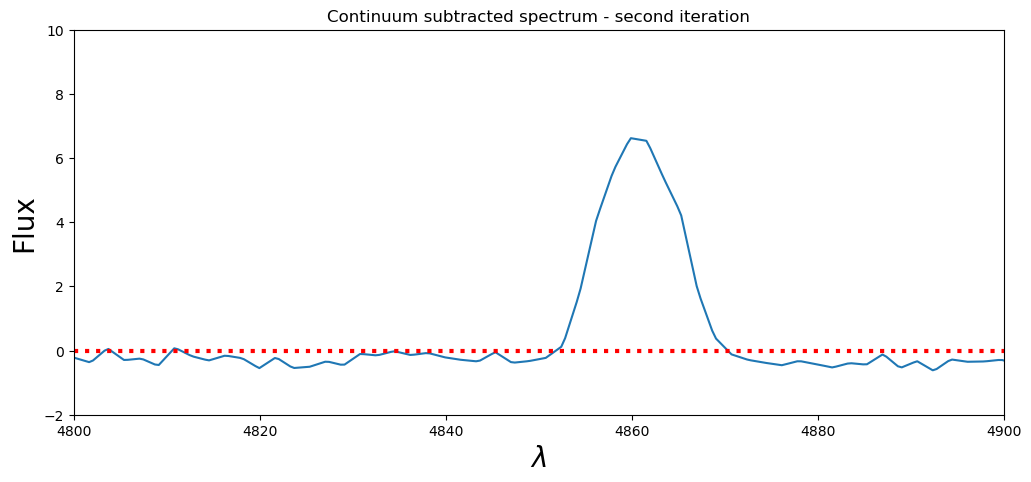

In [36]:
#compute the average of a region away from the line using the zoom in above
#*********************
#your code here
#find the region with a boolean array
contlam = (specm57.wavelength>4800 *u.Angstrom) & (specm57.wavelength<4840 * u.Angstrom)

#now compute the average of the continuum subtracted spectrum in that region and print it out.
meancont = np.mean(contlam)
print('mean continuum = %5.3f' % meancont)

#now correct the continuum subtracted spectrum by that amount
contsubspec -= meancont

#first zoom in on the Hbeta line
f,ax = plt.subplots(figsize=(12,5))  
ax.plot(specm57.wavelength, contsubspec, label='continuum subtracted data')  
ax.set_title("Continuum subtracted spectrum - second iteration")  
ax.set_xlim(4800,4900)
ax.set_ylim(-2,10)
ax.axhline(0.0,color='red',linestyle=':',linewidth=3,label='zero for reference')
ax.set_xlabel("$\lambda$",fontsize=20)
ax.set_ylabel("Flux",fontsize=20)


#### Problem 2c (5 points)
Comment on whether the spectra now has a better continuum subtraction and how you know this.

**your answer here** The continuum here looks nearly identical to the model fitting I did. Maybe I just had good fitting. That said it should be an improvement since I did a localized continuum fitting and subtracted it from the fitting already done. It doesn't appear to have overcorrected thus it should have improved the continuum subtraction. It's a definitive improvement over the non subtracted plot which saw the continuum at nearly a flux of 2

Now you will need to fit a gaussian to the spectrum.  We blow up around the line and the run a Gaussian line fitter to estimate the parameters of the Gaussian.  You will then use these to measure the $\Delta \lambda$ and the spectral resolution $R$

Spectrum1D (length=9372)
flux:             [ 23.99, ..., -0.067237 ],  mean=1.0063
spectral axis:    [ 3700.2 Angstrom, ..., 7599.6 Angstrom ],  mean=5649.9 Angstrom
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude   mean    stddev 
              Angstrom Angstrom
    --------- -------- --------
          7.0      5.0      1.0
[3700.20631921 3700.62242944 3701.03853967 ... 7598.74308666 7599.15919689
 7599.57530712] Angstrom
[0. 0. 0. ... 0. 0. 0.]
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
    amplitude   mean    stddev 
              Angstrom Angstrom
    --------- -------- --------
          7.0      5.0      1.0
Delta Lambda =  1.00
R =   1.00


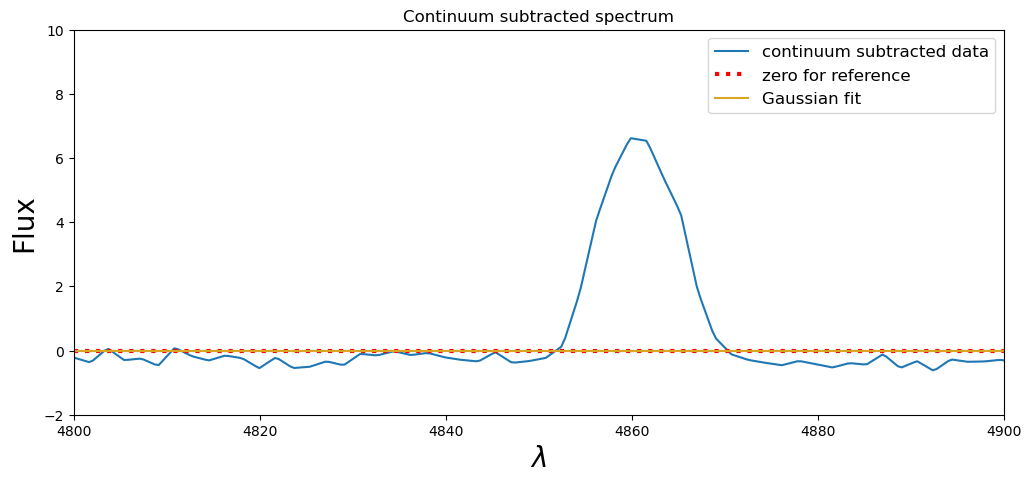

In [199]:
#first zoom in on the Hbeta line
f,ax = plt.subplots(figsize=(12,5))  
ax.plot(specm57.wavelength, contsubspec, label='continuum subtracted data')  
ax.set_title("Continuum subtracted spectrum")  
ax.set_xlim(4800,4900)
ax.set_ylim(-2,10)
ax.axhline(0.0,color='red',linestyle=':',linewidth=3,label='zero for reference')
ax.set_xlabel("$\lambda$",fontsize=20)
ax.set_ylabel("Flux",fontsize=20)

#now fit a gaussian to the spectrum
# Fit the spectrum and calculate the fitted flux values (``y_fit``)
spectrum = Spectrum1D(flux=contsubspec, spectral_axis=specm57.wavelength)
print(spectrum)
#**********************
#you need to supply the initial guesses for the amplitude, mean, and stddev
#we are assuming thast the flux is unitless because the spectrum isn't calibrated.
g_init = models.Gaussian1D(amplitude=7, mean= 5 , stddev=1 )

#fit the line using the initial guesses
g_fit = fit_lines(spectrum, g_init,get_fit_info=True)
print(g_fit)
#determine the model flux
y_fit = g_fit(specm57.wavelength)
print(specm57.wavelength)
print(y_fit)
#plot model flux
ax.plot(specm57.wavelength,y_fit,color='goldenrod',label='Gaussian fit')
ax.legend(fontsize=12)

#print all the paramters
print(g_fit)

#assign the standard deviation to a variable
params = g_fit.param_sets
amp = params[0][0]
mean = params[1][0]
stddev = params[2][0]

#*********************
#Your code here
#you will need to use the fitted parameters to determine the Delta lambda and the spectral resolution
# (remove for students) I compute this using the relation between a Gaussian sigma and the FWHM
deltalam = 1 #set to one just so I can see the plot
print('Delta Lambda = %5.2f' % deltalam)

#calculate the spectral resolution
specres = 1 #set to one just so I can see the plot
print('R = %6.2f' % specres)


#### Problem 2d (5 points)
Comment in this cell on how the two methods agree and which one you think is more reliable.

**answer here** 

The code doesn't seem to be working! I'm not quite sure why that's the case as it should be able to make a gaussian fit. In general I would say a gaussian fitting approach is much more reliable as you can provide uncertainty and it's a more accurate scientific approach as opposed to doing it by eye. That said, given that this code isn't working the by eye method is more reliable in that regard (Unless you're blind).

### Problem 3 (10 points)
Assume that the slit went right through the center of the planetary nebula.  Using what you know about the composition of planetary nebula (not necessarily from this class), describe here from where the broad emission lines and sharp rise in flux at the blue end of the planetary nebula come from.

**answer here**

Planetary nebula are made up of moving gas which leads to broad emission lines as Doppler broadening occurs from the higher velocities of the gas. They also typically house a white dwarf in their center which can ionize the gas. We know that hotter objects emit more blue than cooler objects and that ionization increases temperature. Therefore, as this gas in the planetary nebula is ionized we should expect to see a significant increase in the flux at the blue end of the spectrum. 

### Problem 4 (30 points)

In this problem you see a comparison of Jupiter's spectrum to that of a G2V star similar to the sun. You will need to answer the following questions

a. Measure the temperature of each spectrum from the shape of the spectrum.

b. Compare the two temperatures.  

c. All the visible light we see from Jupiter is reflected sunlight.  Do your best given your knowledge of how light propogates through different media to describe a possible origin for the relative values of the temperatures.  You can also include a discussion of the relative colors of the spectra.

For each part here I would like a significant amount of discussion.  You will put your answers below the code.

*As an aside, note that the very wide absorption lines longward of 6000$\mathring A$ in Jupiter's spectrum are absorption bands from molecules in Jupiter's atmosphere.  These bands absorb light over a wide wavelength range.*

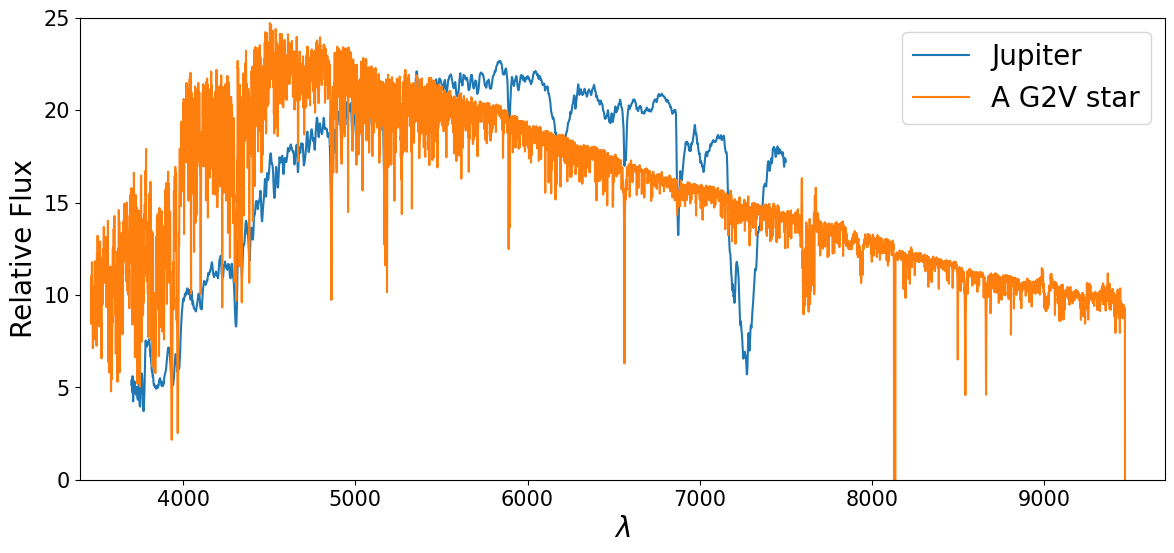

In [56]:
#this is a comparison star from a library similar to that we used in our 
#very first spectral exercise.
starpath = '95128.txt'  #G2V
star1 = Table.read(starpath,format='ascii', names=('lambda','flam'))

#plot Jupiter
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specjup.wavelength,specjup.flux*20,label="Jupiter")

#smooth the comparison stellar spectrum so that the many spectral features
#don't make the comparison difficult.  We use a boxcar filter of size "kernel_size"
#**********
#You should make the intial plot with a smoothing kernel of 1 to see how the unsmoothed 
#very high resolution G2V spectrum looks like.  Then you should change the kernel size to 20 to see 
#how it is easier to use.
#If you'd like you can play more with the kernel size, but it is not required.
kernel_size = 1
kernel = np.ones(kernel_size) / kernel_size
star1convflam = np.convolve(star1['flam'], kernel, mode='same')
#plot the convolved spectrum
plt.plot(star1['lambda'],star1convflam*20, label = 'A G2V star')

#**************
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
fluxmin = 0  #original 0
fluxmax = 25 #original 25
lammin =3400 #original 3400
lammax = 9700 #original 9700
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.legend(fontsize=20)

In [ ]:
#***************
#Any code needed for problem 4 goes here.  Please print your temperatures.  


In [72]:
#Temperature from the shape of each spectrum
#for simplicity let's use Wien's law i.e. the peak wavelength = 2898 uk /T
jupflux=specjup.flux*20
#np.shape(jupflux)
jupmax=np.argmax(jupflux)

juppeakwave=specjup.wavelength[jupmax]
print(juppeakwave)
temp=(2.898 *10**-3)/(juppeakwave*10**-10)
print(temp) #This gives a questionable temperature of jupiter and is not relexative of the temperature at it's surface

#now for the star

star1max=np.argmax(star1convflam*20)

star1peakwave=star1['lambda'][star1max]
print(star1peakwave)
startemp=(2.898*10**-3)/(star1peakwave*10**-10)
print(startemp)

5841.419203168201 Angstrom
4961.123143547405 1 / Angstrom
4503.8
6434.566366179671


**answer to part a here**  Make sure to provide all calculations either in code or in LaTeX.  

In [74]:
print('Temperature of Jupiter: 4961.12 K')

Temperature of Jupiter: 4961.12 K


In [202]:
print('Temperature of A G2V Star: ', np.round(startemp, 2), 'K')

Temperature of A G2V Star:  6434.57 K


**answer to part b here**  Make sure to provide all calculations either in code or in LaTeX.
Compare the two temperatures

Answer: The temperatures are around what I would expect given I approximated based on a blackbody spectra. Jupiter's value is significantly larger than anticipated (before looking at the spectrum) but the next part will cover that. Given that the A G2V spectra peaks sooner I anticipated a higher temperature compared to Jupiters which is what we see. 

**answer to part c here**  Make sure to provide all calculations either in code or in LaTeX.

All the visible light we see from Jupiter is reflected sunlight. Do your best given your knowledge of how light propogates through different media to describe a possible origin for the relative values of the temperatures. You can also include a discussion of the relative colors of the spectra.

Answer: The "surface" temperature of Jupiter itself is actually quite small (rougly 200 K if I remember correctly) so since we're looking at visible light which is essentially reflected sunlight, it makes sense that we should see a higher temperature. Essentially, the Sun emits to Juipter and it reflects some light while also absorbing others i.e. why we have absorption lines. That lines up well with the fact that the Sun's approximate surface brightness is 5800 K so we should get a ballpark similar answer. The A G2V Star is essentially a blackbody and the spectra is typically characteristic of the surface so it's temperatrue makes perfect sense.

### Problem 5 - Identify features in spectrum of Jupiter (20 points)

In this exercise you will identify various components of the spectrum of Jupiter.  In doing this you can zoom in and out of the plot using the `ax.set_xlim` and `ax.set_ylim()` commands.  

Using what you know about the spectral lines in an A0V star and given the spectrum of Vega plotted below, identify as many of the lines as you can in the spectrum of Jupiter.  By "identify" I mean give the wavelength, the name of the element that makes the line, and which transition of that element causes the specific line.  If you think you should fine a line and can't write why it isn't there.  Please be detailed in your answer. *Note - The line at 6880$\mathring A$ is from the Earth's atmosphere and should be ignored*
**answer here**

Answer: The lines I find include: MgI (5170 A), FeI(5270 A)(though it is iffy), H beta (4861 A), H alpha (6563 A), NaD (5890 A), and possibly HE II (5411 A). Each of these lined up well with the lines we see and for the most part make sense to expect to see in Jupiter. I went through some of the other nearby lines close to these and zoomed in to find that these lined up the best. There were three other potential lines that I couldn't identify. One around 4200 A which may or may not be a line as the spectra is not at a stable point then. Another around 6250 A which is quite broad which either means that its either a line that wasn't in the list (or multiple lines) or it's some weird artifact and broad absorption feature of the atmosphere as a whole as opposed to being associated with a line. I favor this idea given that Vega shows nothing there. Lasly, a few potential lines are present past 7000 A which don't line up with the list I used. Given that Vega does show absorption there as well, I'm more inclined to believe that these are simply lines we don't have in the list.

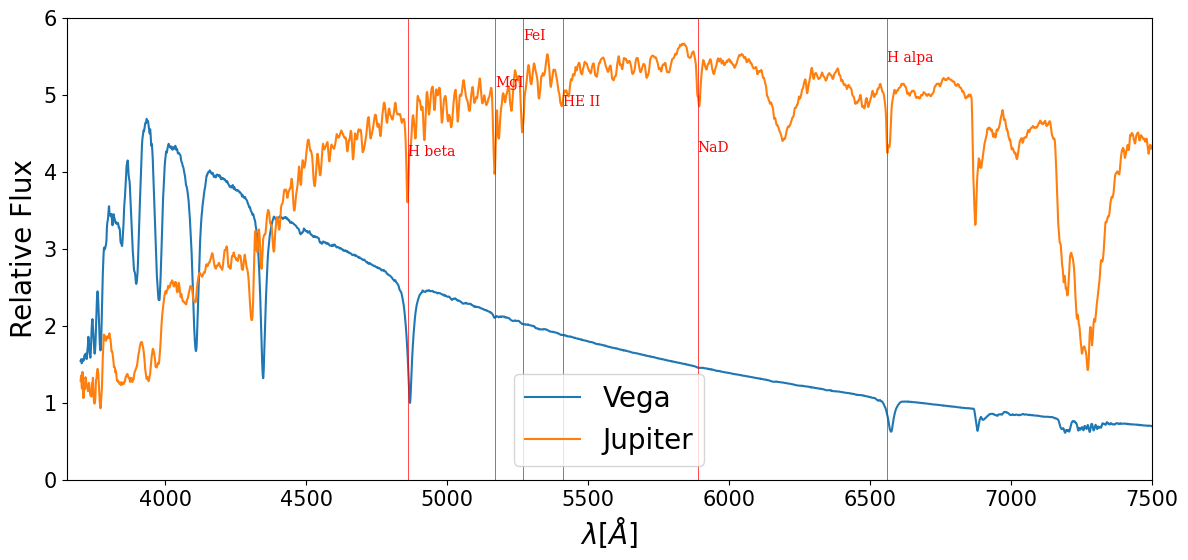

In [141]:
#plot Vega and Jupiter, where I have scaled the flux of Jupiter so that they 
#better overlap. You can change that scaling
plt.figure(figsize = (14,6))
ax = plt.gca()
plt.plot(specvega.wavelength,specvega.flux,label="Vega")
plt.plot(specjup.wavelength,specjup.flux*5,label="Jupiter")

#**************
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
fluxmin = 0  #original 0
fluxmax = 6 #original 6
lammin =3650 #original 3650
lammax = 7500 #original 7500
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])


linelist = [
   # ('[AR IV]',4740), no
   #  ('[OII]',3727), no 
    # ('[O III]',4363), no
    # ('[O III]',4959), no
    # ('[O III]',5007), no
   #  ('[O I]',6300), no
    #('[OI]',6363), no 
   #  ('[N II]',6548), #no
    # ('[N II]',6584), #no
   #  ('[S II]',6716), no
    # ('[S II]',6731), no
    #('CIII',4647), no
     ('MgI',5170), #yes
    ('FeI', 5270), #Maybe
  #   ('Hepsilon',3970),  no
   #  ('Hdelta',4103), too noisy to tell
   #  ('H gamma',4341), # not really
     ('H beta',4861), #yes
     ('H alpa',6563), #yes
     ('NaD', 5890), #likely
  #   ('HeII',4541), #no
   #  ('He II',4686), #no
    #  ('HeI',4471), #no 
     ('HE II',5411), # hard to tell
  #   ('[CL III]',5517), #no
   #  ('[CL III]',5537), #no
    # ('[N II]',5755), #no
   #  ('He I',5875), #no
   #  ('HeI',7065), no
  #   ('[Ar III]',7135), no but is nearby
  #  ('FeI',5335) no
]
#draw lines on the spectrum
lineplot(linelist)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda [\AA]$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.legend(fontsize=20)


### Problem 6 - Discuss the physical conditions that drive line formation (20 points)

In this exercise you will identify various components of the spectrum of Jupiter.  In doing this you can zoom in and out of the plot using the `ax.set_xlim` and `ax.set_ylim()` commands.  

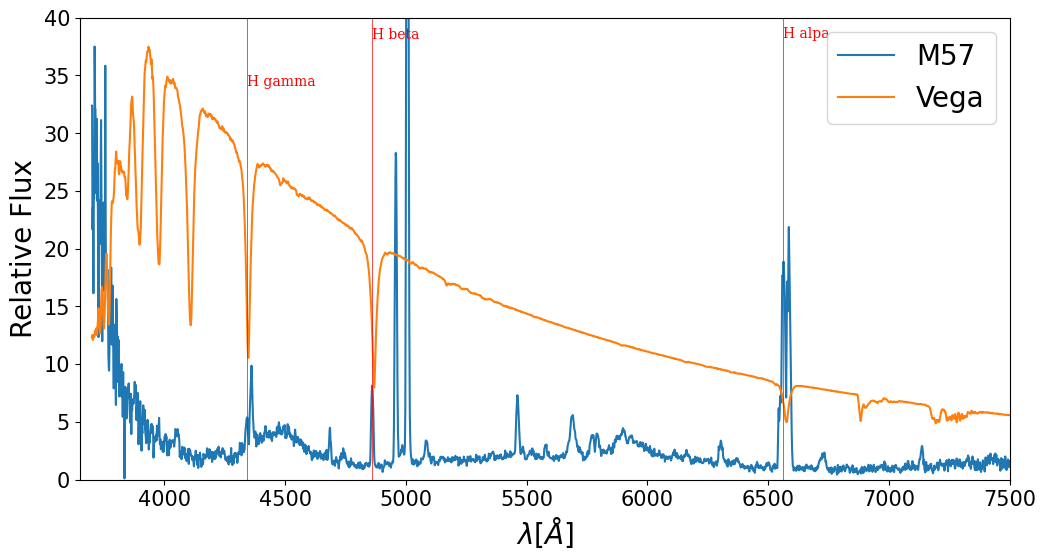

In [188]:
#plot Vega and M57, where I have scaled the flux of Jupiter so that they 
#better overlap. You can change that scaling
plt.figure(figsize = (12,6))
ax = plt.gca()
plt.plot(specm57.wavelength,specm57.flux,label="M57")
plt.plot(specvega.wavelength,specvega.flux*8,label="Vega")

#**************
#you can change these to zoom in and out of certain parts of the spectra.  
#Make a copy of these and change your copy so as to remember what the 
#original values were
fluxmin = 0  #original 0
fluxmax = 40#original 40
lammin =3650 #original 3650
lammax = 7500 #original 7500
ax.set_ylim([fluxmin,fluxmax])
ax.set_xlim([lammin,lammax])

linelist = [
   #  ('[AR IV]',4740), #no
   #  ('[OII]',3727), #no
   #  ('[O III]',4363), #likely not
   # ('[O III]',4959), only in M57
   #  ('[O III]',5007),#only in M57
    # ('[O I]',6300), #no
    #('[OI]',6363), #no
   #  ('[N II]',6548), #no
    # ('[N II]',6584), #potential candidate
    # ('[S II]',6716),#no
    # ('[S II]',6731), #no
   #  ('CIII',4647), #no
   #  ('MgI',5170), #no
   #  ('FeI', 5270), #no
   #  ('Hepsilon',3970), # Only really present in Vega
   #  ('Hdelta',4103), # Only really present in Vega
    ('H gamma',4341), #Very likely 
     ('H beta',4861), #very likely
     ('H alpa',6563), #Very likely
  #   ('NaD', 5890), #no 
   #  ('HeII',4541), #no
    # ('He II',4686), #no
  #   ('HeI',4471), #no 
  #   ('HE II',5411), #no
  #   ('[CL III]',5517), #no 
  #   ('[CL III]',5537), #no 
  #   ('[N II]',5755), #no
   #  ('He I',5875), #no
    # ('HeI',7065), #no
    # ('[Ar III]',7135), #no
   #  ('FeI',5335) #no
]
#draw lines on the spectrum
lineplot(linelist)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$\lambda [\AA]$",fontsize=20)
plt.ylabel("Relative Flux",fontsize=20)
plt.legend(fontsize=20)

There are lines in common between M57 and Vega but they are in absorption in Vega and in Emission in M57. Note that the lines do not perfectly line up in wavelength as the M57 spectrum has not been perfectly wavelength calibrated.  

**(a)** Identify the lines in common.

**(b)** Explain why they are in emission in one spectrum and in absorption in the other.  Use your knowledge of Kirkhoffs laws.

*Note - The line at 6880$\mathring A$ is from the Earth's atmosphere and should be ignored.*

**answer here**

Answer A: By going through the lines in the list from above I found the 3 lines that matched the most clear emisssion lines in M57 that matched with the absorption lines in Vega. These lines are the H alpha line (6563 A) the H beta line (4861 A) and the H gamma line (4341 A). 

Answer B: Emission lines are more likely in high energy/extremely hot regions such as the ionized planetary nebula of M57 compared to absorption which is commonly seen for things such as the outer surfaces of stars. We can think of this in terms of Kirkoffs laws. the outer layers of a star are less dense and cooler than the inner layers and thus function as a "low density", "cool gas" that create an absorption line spectrum. Planetary nebula like M57 are low density (non astrophysically speaking) and hot compared to their cool surroundings and thus emit i.e. have an emission spectrum.  